In [37]:
# Preparation part

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd

# load the data
df08 = pd.read_stata("qc_pub_fy2008.dta").assign(year=2008)
df09 = pd.read_stata("qc_pub_fy2009.dta").assign(year=2009)
df10 = pd.read_stata("qc_pub_fy2010.dta").assign(year=2010)
df11 = pd.read_stata("qc_pub_fy2011.dta").assign(year=2011)
df12 = pd.read_stata("qc_pub_fy2012.dta").assign(year=2012)
df13 = pd.read_stata("qc_pub_fy2013.dta").assign(year=2013)
df14 = pd.read_stata("qc_pub_fy2014.dta").assign(year=2014)
df15 = pd.read_stata("qc_pub_fy2015.dta").assign(year=2015)
df16 = pd.read_stata("qc_pub_fy2016.dta").assign(year=2016)
df17 = pd.read_stata("qc_pub_fy2017.dta").assign(year=2017)
df18 = pd.read_stata("qc_pub_fy2018.dta").assign(year=2018)
df19 = pd.read_stata("qc_pub_fy2019.dta").assign(year=2019)
df20 = pd.read_stata("qc_pub_fy2020.dta").assign(year=2020)
df21 = pd.read_stata("qc_pub_fy2021.dta").assign(year=2021)
df22 = pd.read_stata("qc_pub_fy2022.dta").assign(year=2022)
df23 = pd.read_stata("qc_pub_fy2023.dta").assign(year=2023)


# defing a clean function 

def clean_columns(df):
    df.columns = (
        df.columns
        .str.strip()                      
        .str.lower()                     
        .str.replace(r'[\s\.-]+', '_', regex=True)  
        .str.replace(r'__+', '_', regex=True)        
    )
    return df


# clean all the df for each year
df08 = clean_columns(df08)
df09 = clean_columns(df09)
df10 = clean_columns(df10)
df11 = clean_columns(df11)
df12 = clean_columns(df12)
df13 = clean_columns(df13)
df14 = clean_columns(df14)
df15 = clean_columns(df15)
df16 = clean_columns(df16)
df17 = clean_columns(df17)
df18 = clean_columns(df18)
df19 = clean_columns(df19)
df20 = clean_columns(df20)
df21 = clean_columns(df21)
df22 = clean_columns(df22)
df23 = clean_columns(df23)



# concat all the data
df_all = pd.concat([
    df08, df09, df10, df11, df12, df13, df14, df15, 
    df16, df17, df18, df19, df20, df21, df22, df23
], ignore_index=True, join="outer")

# check the shape
print(df_all.shape)
print(df_all["year"].value_counts().sort_index())



# create error_flag variable
find_cols = [f"e_findg{i}" for i in range(1, 10)]

df_all["error_flag"] = (
    df_all[find_cols]
    .apply(lambda row: 1 if row.isin([2, 3, 4]).any() else 0, axis = 1)
    .astype(int)
)

(701968, 1312)
year
2008    50214
2009    51250
2010    52289
2011    51115
2012    50027
2013    49569
2014    48250
2015    48022
2016    46595
2017    45530
2018    43738
2019    43258
2020    27112
2021     9832
2022    41391
2023    43776
Name: count, dtype: int64


C:\Users\27311\AppData\Local\Temp\ipykernel_22296\2768135056.py:80: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all["error_flag"] = (


==================================================================================

In [39]:
# calculate the national error rate each year
error_summary = (
    df_all.groupby("year")["error_flag"]
    .agg(["count", "sum"])
    .rename(columns={"count": "Total_Cases", "sum": "Error_Cases"})
)

error_summary["Error_Rate"] = error_summary["Error_Cases"] / error_summary["Total_Cases"]

error_summary = error_summary.round(4)  # round to 4 decimal places
print(error_summary)



      Total_Cases  Error_Cases  Error_Rate
year                                      
2008        50214         3153      0.0628
2009        51250         2684      0.0524
2010        52289         3537      0.0676
2011        51115         3542      0.0693
2012        50027         8213      0.1642
2013        49569         7421      0.1497
2014        48250         6699      0.1388
2015        48022         6719      0.1399
2016        46595         7141      0.1533
2017        45530         7754      0.1703
2018        43738         7797      0.1783
2019        43258         7770      0.1796
2020        27112         4757      0.1755
2021         9832         1887      0.1919
2022        41391         8051      0.1945
2023        43776         8852      0.2022


In [41]:
# Calculate the weighted national error rate each year
# Using FYWGT as case weight (full-year weight from QC codebook)

error_summary_wt = (
    df_all.groupby("year")
    .apply(lambda x: pd.Series({
        "weighted_total": x["fywgt"].sum(),
        "weighted_error": (x["error_flag"] * x["fywgt"]).sum(),
        "total_cases": len(x),
        "error_cases": x["error_flag"].sum()
    }))
)

error_summary_wt["weighted_error_rate"] = (
    error_summary_wt["weighted_error"] / error_summary_wt["weighted_total"]
)
error_summary_wt["unweighted_error_rate"] = (
    error_summary_wt["error_cases"] / error_summary_wt["total_cases"]
)

error_summary_wt = error_summary_wt.round(4)

print(error_summary_wt)


      weighted_total  weighted_error  total_cases  error_cases  \
year                                                             
2008    1.246502e+07    7.172768e+05      50214.0       3153.0   
2009    1.498092e+07    6.647874e+05      51250.0       2684.0   
2010    1.836923e+07    1.023312e+06      52289.0       3537.0   
2011    2.080314e+07    1.195696e+06      51115.0       3542.0   
2012    2.204632e+07    3.451722e+06      50027.0       8213.0   
2013    2.280204e+07    3.256509e+06      49569.0       7421.0   
2014    2.244498e+07    2.791092e+06      48250.0       6699.0   
2015    2.229317e+07    2.874253e+06      48022.0       6719.0   
2016    2.151100e+07    3.144352e+06      46595.0       7141.0   
2017    2.059688e+07    3.315931e+06      45530.0       7754.0   
2018    1.972677e+07    3.361045e+06      43738.0       7797.0   
2019    1.880200e+07    3.233521e+06      43258.0       7770.0   
2020    1.935244e+07    3.337291e+06      27112.0       4757.0   
2021    2.

C:\Users\27311\AppData\Local\Temp\ipykernel_22296\3095912405.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({


***Model***

In [43]:
# Found an unexpeted value from "wrkred1" variable, therefor I decide to replace it.
df_all['wrkreg1'] = df_all['wrkreg1'].replace({6: 5})

In [45]:
# add the dummies for the present of children and erlder
df_all["children_present"] = (df_all["fsnkid"] > 0).astype(int)
df_all["elderly_present"] = (df_all["fsnelder"] > 0).astype(int)


C:\Users\27311\AppData\Local\Temp\ipykernel_22296\2020590630.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all["children_present"] = (df_all["fsnkid"] > 0).astype(int)
C:\Users\27311\AppData\Local\Temp\ipykernel_22296\2020590630.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all["elderly_present"] = (df_all["fsnelder"] > 0).astype(int)


In [47]:
# build a map from FIPS code to state dummy 
state_map = {
    1: "Alabama", 2: "Alaska", 4: "Arizona", 5: "Arkansas", 6: "California",
    8: "Colorado", 9: "Connecticut", 10: "Delaware", 11: "District_of_Columbia",
    12: "Florida", 13: "Georgia", 15: "Hawaii", 16: "Idaho", 17: "Illinois",
    18: "Indiana", 19: "Iowa", 20: "Kansas", 21: "Kentucky", 22: "Louisiana",
    23: "Maine", 24: "Maryland", 25: "Massachusetts", 26: "Michigan",
    27: "Minnesota", 28: "Mississippi", 29: "Missouri", 30: "Montana",
    31: "Nebraska", 32: "Nevada", 33: "New_Hampshire", 34: "New_Jersey",
    35: "New_Mexico", 36: "New_York", 37: "North_Carolina", 38: "North_Dakota",
    39: "Ohio", 40: "Oklahoma", 41: "Oregon", 42: "Pennsylvania",
    44: "Rhode_Island", 45: "South_Carolina", 46: "South_Dakota",
    47: "Tennessee", 48: "Texas", 49: "Utah", 50: "Vermont", 51: "Virginia",
    53: "Washington", 54: "West_Virginia", 55: "Wisconsin", 56: "Wyoming",
    66: "Guam", 72: "Puerto_Rico", 78: "Virgin_Islands"
}

# build a map for other variables
dummy_rename = {

    # ---------------------------------------------
    # COMPOSITION (unit composition)
    # ---------------------------------------------
    # 'composition_1.0': 'Comp_ChildrenOnly',
    # 'composition_2.0': 'Comp_Children_OneMaleAdult',
    # 'composition_3.0': 'Comp_Children_OneFemaleAdult',
    # 'composition_4.0': 'Comp_Children_MarriedAdults',
    # 'composition_5.0': 'Comp_Children_MultipleAdults',

    # ---------------------------------------------
    # SEX1 (sex of household head)
    # 1=Male, 2=Female, 3=Unknown/Other
    # ---------------------------------------------
    'sex1_2.0': 'Female',
    'sex1_3.0': 'Sex_Unknown',

    # ---------------------------------------------
    # EMPSTAL (employment status)
    # 1=Not in labor force
    # 2=Unemployed, seeking work
    # 3=Active-duty military
    # 4=Migrant farm labor
    # 5=Non-migrant farm labor
    # 6=Self-employed farming
    # 7=Self-employed nonfarming
    # 8=Employed by others
    # ---------------------------------------------
    'empsta1_2.0': 'Emp_Unemployed',
    'empsta1_3.0': 'Emp_Military',
    'empsta1_4.0': 'Emp_MigrantFarm',
    'empsta1_5.0': 'Emp_NonMigrantFarm',
    'empsta1_6.0': 'Emp_SelfEmp_Farm',
    'empsta1_7.0': 'Emp_SelfEmp_NonFarm',
    'empsta1_8.0': 'Emp_EmployedByOthers',

    # ---------------------------------------------
    # WRKREG1 (work registration)
    # 1=work registrant
    # 2=Exempt, physically or mentally unfit for employment
    # 3=Exempt, care of a child under six or an incapacitated person
    # 4=Exempt, working and/or earning the equivalent of 30 hours per week
    # 5=Exempt, other
    # ---------------------------------------------
    'wrkreg1_2.0': 'WorkReg_Exempt_Participating',
    'wrkreg1_3.0': 'WorkReg_NotExempt_NotPartic',
    'wrkreg1_4.0': 'WorkReg_NotExempt_Participating',
    'wrkreg1_5.0': 'WorkReg_Unknown',

    # ---------------------------------------------
    # REP_SYS (reporting requirement)
    # 1 = $25 reporting
    # 2 = $80 reporting
    # 3 = $100 reporting
    # 4 = Status reporting
    # 5 = 5+ hour change reporting
    # 6 = Simplified reporting
    # 7 = Quarterly reporting
    # 8 = Monthly reporting
    # 9 = Transitional/no reporting
    # 10 = Other
    # ---------------------------------------------
    # 'rep_sys_2.0': 'RepSys_80Dollar',
    # 'rep_sys_3.0': 'RepSys_100Dollar',
    # 'rep_sys_4.0': 'RepSys_Status',
    # 'rep_sys_5.0': 'RepSys_HoursChange',
    # 'rep_sys_6.0': 'RepSys_Simplified',
    # 'rep_sys_7.0': 'RepSys_Quarterly',
    # 'rep_sys_8.0': 'RepSys_Monthly',
    # 'rep_sys_9.0': 'RepSys_Transitional',
    # 'rep_sys_10.0': 'RepSys_Other',

    # ---------------------------------------------
    #EXPEDSER- R - received expedited service
    # 1 = Entitled to expedited service and received benefits within Federal time frame
    # 2 = Entitled to expedited service but did not receive benefits within Federal time frame
    # 3 = Not entitled to expedited service
    # ---------------------------------------------
    # 'expdeser_1.0': 'ExpeditedService_Yes',
    'expedser_2.0': 'ExpeditedService_FederalTime',
    'expedser_3.0': 'ExpeditedService_LateFederalTime',

    # ---------------------------------------------
    # CAT_ELIG (categorical eligibility)
    # 0 = Not categorically eligible
    # 1 = Eligible via PA/TANF etc
    # 2 = Recoded eligible after review
    # ---------------------------------------------
    'cat_elig_1': 'CatEligible_PAorTANF',
    'cat_elig_2': 'CatEligible_Recoded',

    # ---------------------------------------------
    # YRSED1 (education)
    # 1 None
    # 2 Grades 1–8
    # 3 Grades 9–12, no diploma
    # 4 GED/High school diploma
    # 5 Some college
    # 6 Associate degree
    # 7 Bachelor’s
    # 8 Graduate/professional degree
    # But I put yrsed1 as a continuous variable

    
}

variable_rename = {

    # Continuous
    'ctprhh': 'Num_of_People_in_Household',
    'fstotde2': 'ME_of_Total_Deduction',
    'fsusize': 'HH_Size',
    'children_present': 'children_present',
    'elderly_present': 'elderly_present',
    'fsndis': 'Num_Disabled',
    'fsnetinc': 'Final_Net_Income',
    'tpov': 'Income_to_Poverty_Ratio',
    'certmth': 'Months_Since_Cert',

    # Binary Vars
    'fsasset': 'Asset_Test_Applicability',
    'fsvehast': 'Vehicle_Test_Applicability',
    'abwdst1': 'Able-Bodied_Adult_Without_Dependents',
    'ssi_cap': 'SSI_CAP_Participation',
    'fsafil1': 'CaseAffiliation',
    'authrep': 'Authorized_Representative',
    'actntype': 'Cert_vs_Recert',
}

In [49]:
df_all['state']

0          9
1          9
2          9
3          9
4          9
          ..
701963    66
701964    66
701965    66
701966    66
701967    66
Name: state, Length: 701968, dtype: int8

In [51]:
# change the state from numbers to ab. names
df_all['state'] = df_all['state'].map(state_map)

In [53]:
# case id
df_all['case_id'] = range(1, len(df_all) + 1)

C:\Users\27311\AppData\Local\Temp\ipykernel_22296\3591726586.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_all['case_id'] = range(1, len(df_all) + 1)


===========================================================================

In [66]:
# Map the AGENCY(1-99) values
agency_map = {
    1: "information not reported",
    2: "incomplete or incorrect information provided; agency not required to verify",
    3: "information withheld by client (case referred for intentional program violation investigation)",
    4: "incorrect information provided by client (case referred for ipv investigation)",
    7: "inaccurate information reported by collateral contact",
    8: "acted on incorrect federal computer match information not requiring verification",
    10: "policy incorrectly applied",
    12: "reported information disregarded or not applied",
    14: "agency failed to follow up on inconsistent or incomplete information",
    15: "agency failed to follow up on impending changes",
    16: "agency failed to verify required information",
    17: "computer programming error",
    18: "data entry and/or coding error",
    19: "mass change (error due to problem with computer-generated mass change)",
    20: "arithmetic computation error",
    21: "computer user error",
    99: "other"
}

for i in range(1, 10):
    col = f"agency{i}"
    label_col = f"agency{i}"
    df_all[label_col] = df_all[col].map(agency_map)


In [68]:
# map the e_findg1-9
e_findg_map = {
    2: "overissuance",
    3: "underissuance",
    4: "ineligible"
}

for i in range(1, 10):
    col = f"e_findg{i}"
    label_col = f"e_findg{i}"
    df_all[label_col] = df_all[col].map(e_findg_map)


In [76]:
# map the element1-9
element_map = {
    111: "student status",
    130: "citizenship and noncitizen status",
    140: "residency",
    150: "unit composition",
    151: "recipient disqualification",
    160: "employment and training programs",
    161: "time-limited participation",
    162: "work registration requirements",
    163: "voluntary quit/reduced work effort",
    164: "workfare and comparable workfare",
    165: "employment status/job availability",
    166: "acceptance of employment",
    170: "social security number",
    211: "bank accounts or cash on hand",
    212: "nonrecurring lump-sum payment",
    213: "other liquid assets",
    221: "real property",
    222: "vehicles",
    224: "other nonliquid resources",
    225: "combined resources",
    311: "wages and salaries",
    312: "self-employment",
    314: "other earned income",
    321: "earned income deductions",
    323: "dependent care deduction",
    331: "rsdi benefits",
    332: "veterans' benefits",
    333: "ssi and/or state ssi supplement",
    334: "unemployment compensation",
    335: "workers' compensation",
    336: "other government benefits",
    342: "contributions",
    343: "deemed income",
    344: "tanf, pa, or ga",
    345: "educational grants/scholarships/loans",
    346: "other unearned income",
    350: "child support payments received from absent parent",
    361: "standard deduction",
    363: "shelter deduction",
    364: "standard utility allowance",
    365: "medical expense deductions",
    366: "child support payment deduction",
    371: "combined gross income",
    372: "combined net income",
    520: "arithmetic computation",
    530: "transitional benefits",
    560: "reporting systems",
    810: "snap simplification project",
    820: "demonstration projects"
}

for i in range(1, 10):
    col = f"element{i}"
    df_all[col] = df_all[col].map(element_map)


In [78]:
# map the nature
nature_map = {
    6: "eligible person(s) excluded",
    7: "ineligible person(s) included",
    12: "eligible person(s) with no income, resources, or deductible expenses excluded",
    13: "eligible person(s) with income excluded",
    14: "eligible person(s) with resources excluded",
    15: "eligible person(s) with deductible expenses excluded",
    16: "newborn improperly excluded",
    20: "incorrect resource limit applied",
    24: "resource should have been excluded",
    28: "incorrect income limit applied",
    29: "exceeds prescribed limit",
    30: "resource should have been included",
    32: "failed to consider or incorrectly considered income of ineligible member",
    35: "unreported source of income",
    36: "rounding used/not used or incorrectly applied",
    37: "all income from source known but not included",
    38: "more income received from this source than budgeted",
    39: "employment status changed from unemployed to employed",
    40: "employment status changed from employed to unemployed",
    41: "change only in amount of earnings",
    42: "conversion to monthly amount not used or incorrectly applied",
    43: "averaging not used or incorrectly applied",
    44: "less income received from this source than budgeted",
    45: "cost of doing business not used or incorrectly applied",
    46: "failed to consider/anticipate month with extra pay date",
    52: "deduction that should have been included was not",
    53: "deduction included that should not have been",
    54: "incorrect standard used (not as a result of change in unit size or move)",
    64: "incorrect amount used resulting from change in residence",
    65: "incorrect standard used resulting from change in unit size",
    75: "benefit/allotment/eligibility incorrectly computed",
    77: "unit not entitled to transitional benefits",
    79: "incorrect use of allotment tables",
    80: "improper prorating of initial month's benefits",
    97: "not required to be reported or acted upon based on time frames and reporting requirements for allotment differences below the error threshold",
    98: "transcription or computation errors",
    99: "other",
    111: "child support payment(s) not considered or incorrectly applied",
    112: "retained child support payment(s) not considered or incorrectly applied",
    120: "variances/errors resulting from noncompliance with this means-tested public assistance program",
    123: "incorrectly prorated",
    124: "variances resulting from use of automatic federal information exchange system",
    127: "pass-through not considered or incorrectly applied",
    200: "eligible noncitizen excluded",
    201: "ineligible noncitizen included",
    301: "unit improperly participating under retrospective budgeting",
    302: "unit improperly participating under prospective budgeting",
    303: "unit improperly participating under monthly reporting",
    304: "unit improperly participating under quarterly reporting",
    305: "unit improperly participating under semiannual reporting",
    306: "unit improperly participating under change reporting",
    307: "unit improperly participating under status reporting",
    308: "unit improperly participating under 5 hour reporting",
    309: "unit improperly participating in transitional benefits"
}

for i in range(1, 10):
    col = f"nature{i}"
    df_all[col] = df_all[col].map(nature_map)


In [80]:
# map the time period
timeper_map = {
    1: "before most recent action",
    2: "at time of most recent action by agency",
    3: "after most recent action by agency",
    9: "time of occurrence cannot be determined"
}

for i in range(1, 10):
    col = f"timeper{i}"
    df_all[col] = df_all[col].map(timeper_map)


In [82]:
# map the verif
verif_map = {
    1: "verified",
    2: "not verified",
    3: "verification required but not provided",
    4: "verification provided but incorrect or insufficient",
    5: "verification not required",
    9: "not applicable or cannot be determined"
}

for i in range(1, 10):
    col = f"verif{i}"
    df_all[col] = df_all[col].map(verif_map)


In [84]:
# map the case-level data
status_map = {
    1: "amount correct",
    2: "overissuance",
    3: "underissuance"
}

alladj_map = {
    1: "no adjustment",
    2: "prorated benefit",
    3: "other adjustment"
}

case_map = {
    1: "included in error rate calculation",
    2: "excluded—processed by ssa worker",
    3: "excluded—fns designation"
}

actntype_map = {
    1: "certification",
    2: "recertification"
}



df_all["status"] = df_all["status"].map(status_map)
df_all["alladj"] = df_all["alladj"].map(alladj_map)
df_all["case"] = df_all["case"].map(case_map)
df_all["actntype"] = df_all["actntype"].map(actntype_map)


===============================================================

In [94]:
# ============================================
# Feature preprocessing and model training
# ============================================

# Define variable type groups
cont_vars = [
    'ctprhh',        # household composition ratio
    'fstotde2',      # case complexity
    'fsusize',       # household size
    'children_present', 'elderly_present', 'fsndis',   # counts of kids / elderly / disabled
    'fsnetinc', 'tpov',              # net income & income-to-poverty ratio
    'certmth'
]
binary_vars = [
    'fsasset', 'fsvehast', 'abwdst1', 'ssi_cap', 'fsafil1', 'authrep',  # existing flags
    'actntype'                               # newly added
]
cat_vars = [
    'sex1', 'empsta1', 'wrkreg1',  # demographic/employment categories
    'expedser', 'cat_elig', 'state'  # policy/admin + state FE
]

# ---------- new variables from the QC dataset ----------

# 1. continuous variables
cont_vars += [
    # error-level continuous vars
    *[f"amount{i}" for i in range(1, 10)],
    *[f"occdate{i}" for i in range(1, 10)],
    # case-level continuous vars
    "amtadj",
    "amterr",
    "lastcert"
]

# 2. binary variables (none from QC dataset)

# 3. categorical variables
cat_vars += [
    # error-level categorical vars
    *[f"agency{i}" for i in range(1, 10)],
    *[f"e_findg{i}" for i in range(1, 10)],
    *[f"element{i}" for i in range(1, 10)],
    *[f"nature{i}" for i in range(1, 10)],
    *[f"timeper{i}" for i in range(1, 10)],
    *[f"verif{i}" for i in range(1, 10)],

    # case-level categorical vars
    "status",
    "alladj",
    "case",
    "actntype"   # already in binary list, but now clearly defined as categorical
]

# unique
cont_vars = list(dict.fromkeys(cont_vars))
binary_vars = list(dict.fromkeys(binary_vars))
cat_vars = list(dict.fromkeys(cat_vars))

# Final variable collection
feature_cols = cont_vars + binary_vars + cat_vars
target_col = 'error_flag'


In [19]:
# Select variables and target
X = df_all[feature_cols]
y = df_all[target_col]

# check the missing rate
missing_rate = X.isna().mean()   

# check the first few rows
missing_rate

ctprhh              0.000000
fstotde2            0.015855
fsusize             0.000000
children_present    0.000000
elderly_present     0.000000
fsndis              0.000000
fsnetinc            0.015855
tpov                0.000000
certmth             0.000785
fsasset             0.000000
fsvehast            0.000001
abwdst1             0.002020
ssi_cap             0.000000
fsafil1             0.000001
authrep             0.000074
actntype            0.000001
sex1                0.000061
empsta1             0.001547
wrkreg1             0.002737
expedser            0.000076
cat_elig            0.000000
state               0.000000
dtype: float64

In [98]:
# what we want for the final model_variables dataset
model_variables = df_all.copy()

# keep the columns we want
final_cols = ['case_id'] + feature_cols + ["fywgt", "state", "year", target_col]
model_variables = model_variables[final_cols]

# model_variables = model_variables.fillna('NA')

model_variables.to_csv("model_variables.csv", index=False)

In [35]:
# =========================================================================================================================

In [48]:
# Compute missingness per state
missing_by_state = df_all.groupby('state')[feature_cols].apply(lambda x: x.isna().mean())

# Change the format to percentage
missing_by_state_pct = (missing_by_state * 100).round(2)

# We want to quickly recognize the overmissingness from the table
def highlight_over_40(val):
    """
    paint the value larger than 40%
    """
    color = 'background-color: #ff9999' if val > 40 else ''
    return color

# run the painting function
styled_table = missing_by_state_pct.style.applymap(highlight_over_40)

# take a look
styled_table

# export the dataframe to excel
styled_table.to_excel("missingness_by_state_styled.xlsx", engine='openpyxl')

C:\Users\27311\AppData\Local\Temp\ipykernel_26804\2902999095.py:16: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_table = missing_by_state_pct.style.applymap(highlight_over_40)


In [37]:
# Export all the variables we need
df_export = pd.concat([X, y], axis=1)

df_export.to_csv("model_variables.csv", index=False)

In [33]:
# ========================================================================================================================

In [19]:
# Rename the continuous and binary variables
X = df_all[feature_cols].rename(columns=variable_rename)

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=cat_vars, drop_first=True)

In [21]:
# Rename the dummy variables
X = X.rename(columns=dummy_rename)

# Fill missing values (simplify and avoid dimension mismatch)
X = X.fillna(0)

================================================================================================
**Correlation Matrix**

In [59]:
# Use the training dataset, X
X_final = X.copy()

# calculate the matrix
corr_matrix = X_final.corr()

# take a look for the head
corr_matrix.head()

# export the results to csv file
corr_matrix.to_csv("correlation_matrix_full.csv")

,Num_of_People_in_Household,ME_of_Total_Deduction,HH_Size,Num_Children,Num_Elderly,Num_Disabled,Final_Net_Income,Income_to_Poverty_Ratio,Months_Since_Cert,Education_Level,...,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virgin_Islands,state_Virginia,state_Washington,state_West_Virginia,state_Wisconsin,state_Wyoming
Num_of_People_in_Household,1.000000,0.266573,0.942234,0.919539,-0.264371,-0.025966,0.370625,-0.017184,-0.288237,0.039326,...,-0.012884,0.035763,0.028642,-0.014776,0.009449,-0.006210,-0.027790,-0.000789,0.016912,0.006562
ME_of_Total_Deduction,0.266573,1.000000,0.277770,0.243786,0.058269,0.102627,0.330236,0.665328,0.039260,0.020149,...,-0.043223,-0.007229,-0.013758,0.103702,-0.027366,-0.025282,0.009077,-0.035722,0.022595,-0.008039
HH_Size,0.942234,0.277770,1.000000,0.936225,-0.256227,-0.007005,0.406883,-0.006016,-0.288186,0.070394,...,-0.006746,0.028707,0.032451,-0.019972,0.011802,-0.000198,-0.026093,-0.006573,0.000492,0.013122
Num_Children,0.919539,0.243786,0.936225,1.000000,-0.312466,-0.047463,0.327498,-0.048394,-0.291806,0.053489,...,-0.008215,0.041917,0.035861,-0.026729,0.011976,0.000609,-0.024514,-0.018642,-0.000421,0.012571
Num_Elderly,-0.264371,0.058269,-0.256227,-0.312466,1.000000,-0.219101,0.079962,0.279601,0.389799,-0.125282,...,-0.006508,0.005973,-0.022753,0.025656,0.009094,0.002315,-0.000279,0.004951,-0.003457,-0.010900


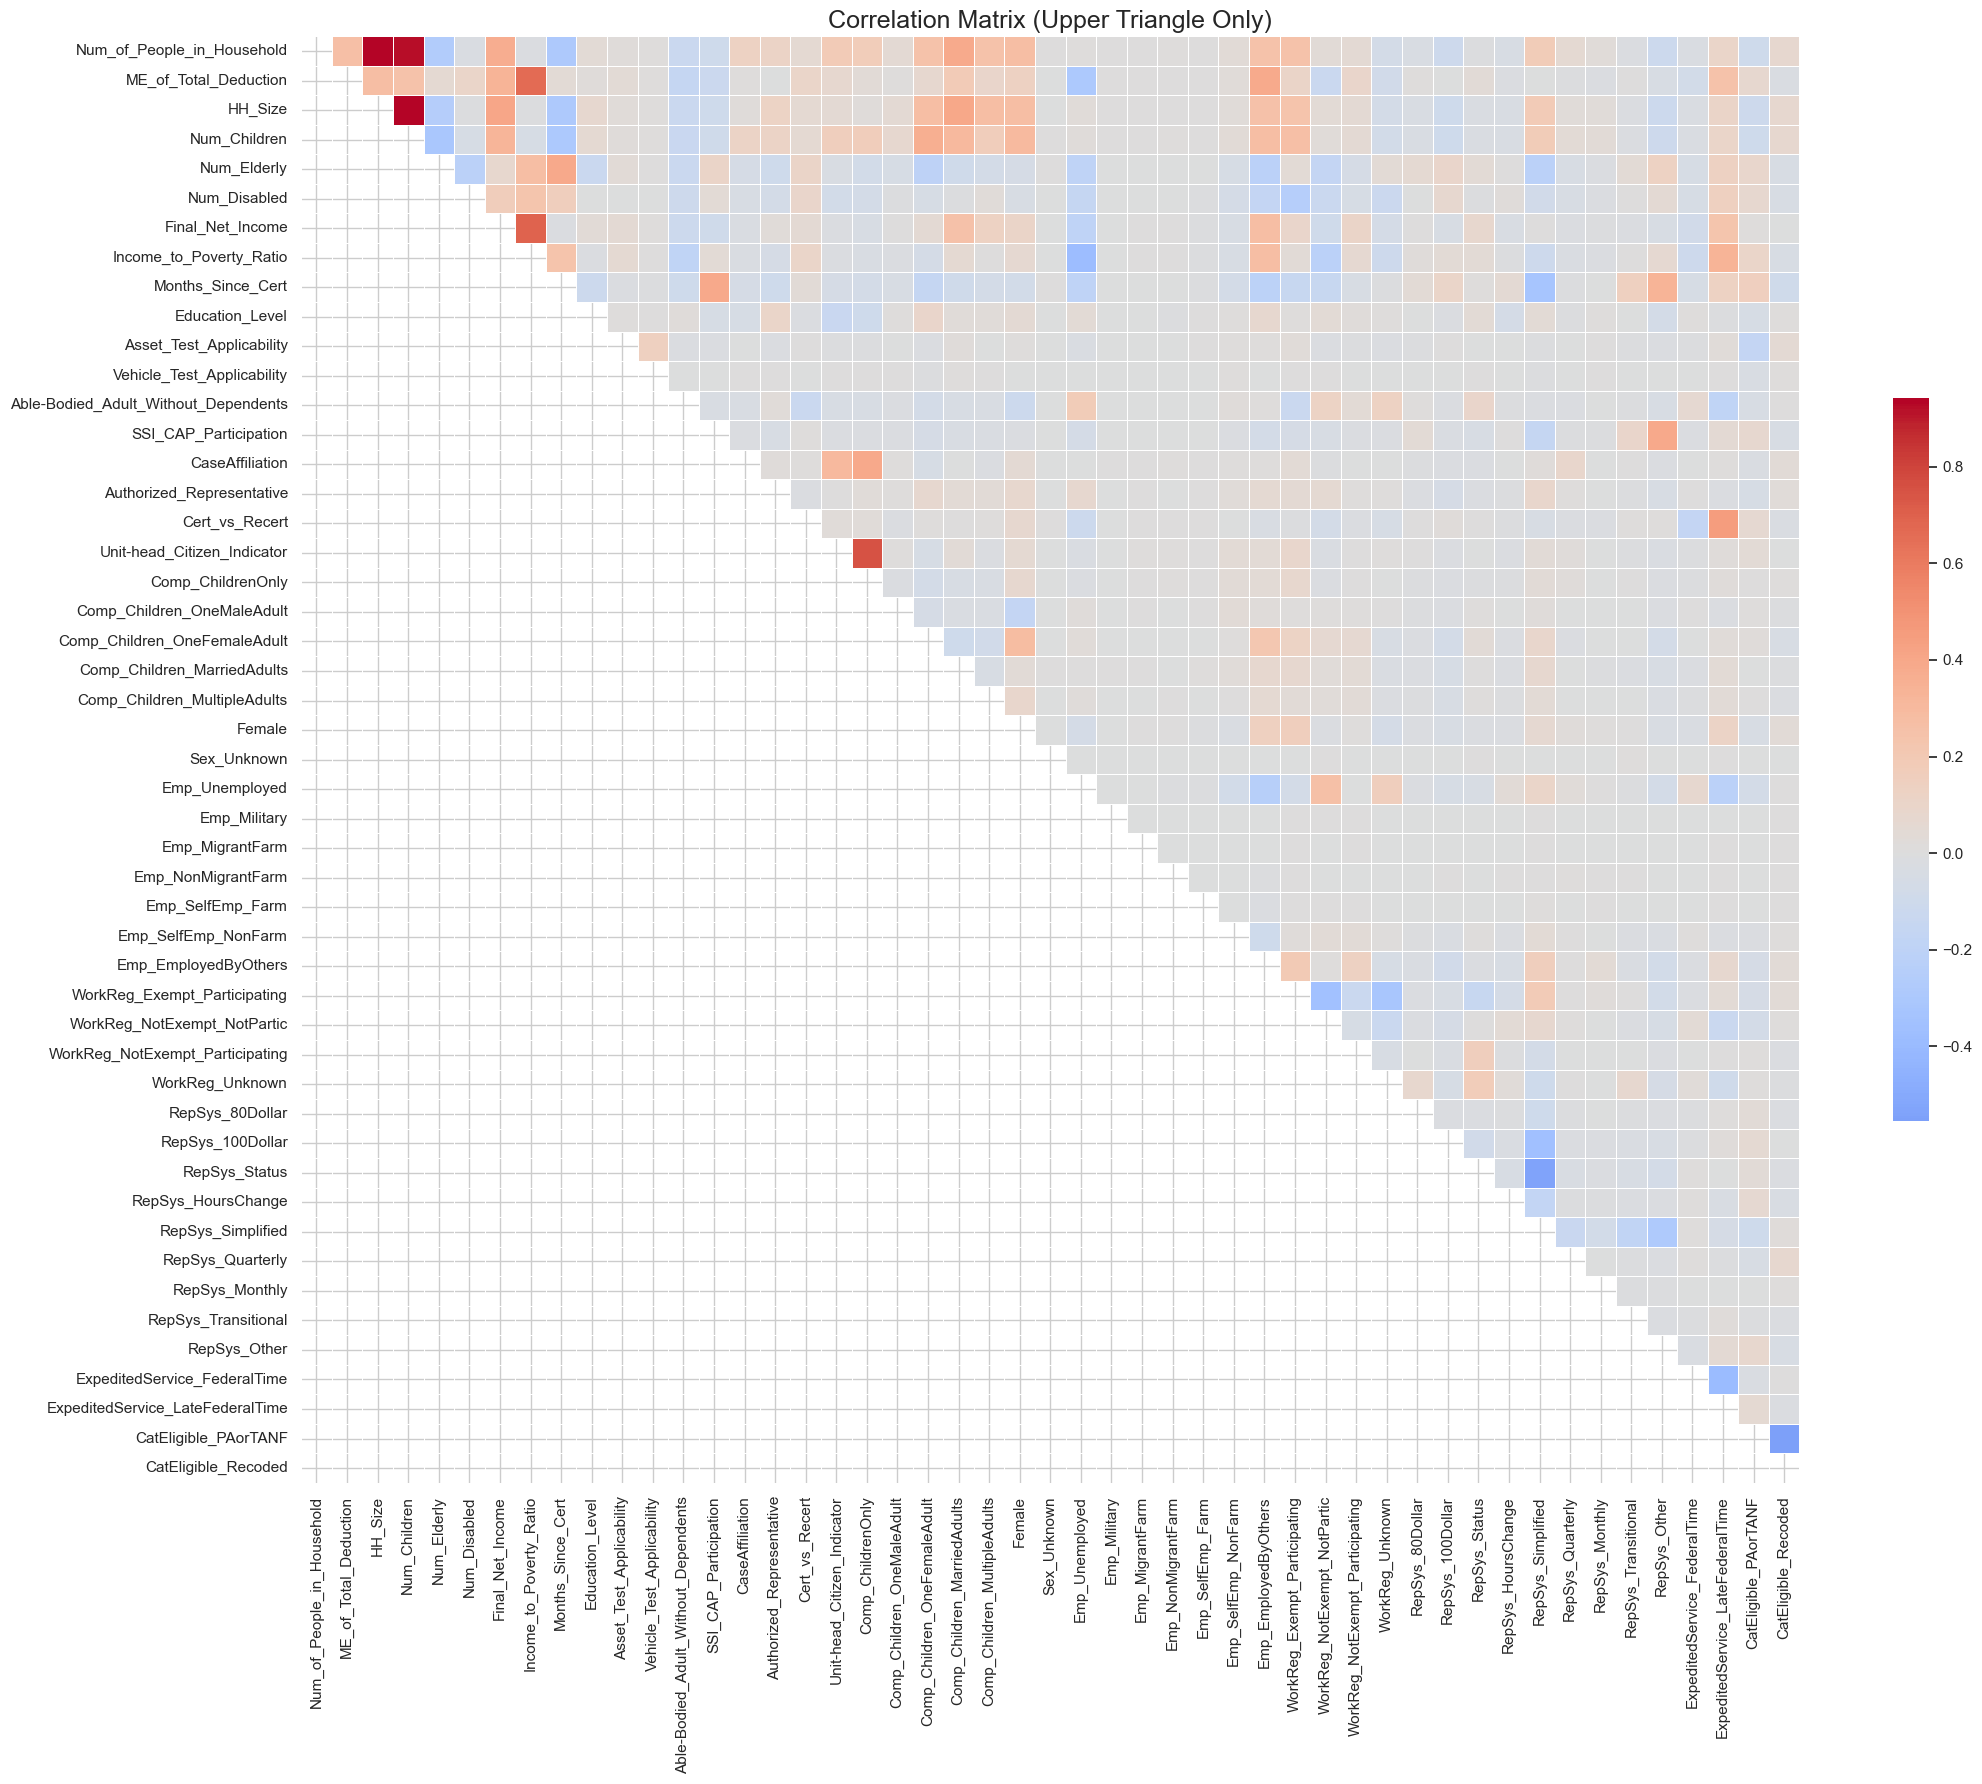

In [83]:
# remove state FE variables
X_no_state = X_final[[col for col in X_final.columns if not col.startswith("state_")]]

# compute correlation
corr_matrix_no_state = X_no_state.corr()

# create mask for Lower triangle → only plot upper triangle
mask = np.tril(np.ones_like(corr_matrix_no_state, dtype=bool))

# draw ONLY ONE figure
plt.figure(figsize=(22, 18))

# transpose so that the variable names appear on top
corr_T = corr_matrix_no_state.T

mask = np.tril(np.ones_like(corr_T, dtype=bool))

sns.heatmap(
    corr_T,
    mask=mask,
    cmap='coolwarm',
    center=0,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)

plt.title("Correlation Matrix (Upper Triangle Only)", fontsize=18)
plt.tight_layout()
plt.savefig("corr_upper_triangle.png", dpi=300, bbox_inches='tight')
plt.show()


The majority of pairwise correlations among predictors are very small (|r| < 0.3), indicating that:
Multicollinearity is generally low across the feature set.



A small number of variable pairs exhibit moderate correlations(0.3 ≤ |r| ≤ 0.7), which largely reflect expected structural relationships rather than problematic redundancy. These correlations do not reach levels that threaten model stability and can be safely retained.



Only a few pairs show high correlation*(|r| > 0.7), most notably: HH_Size ↔ Num_Child (~ 0.94), HH_Size ↔ Num_Children dummies, Some composition dummies (e.g., Comp_Child_ dummies), Unit-head ↔ Cert_vs_Renewal (~ 0.75). 
These reflect logical and unavoidable structural links between variables (e.g., household size is mathematically determined by number of children and other members).

=====================================================================================

In [23]:
# --- Weights ---
# Use the same fywgt you used for weighted error rate
w = df_all["fywgt"].astype(float)

# (optional but recommended) normalize weights to mean=1 (keeps scale stable)
w = w / w.mean()


In [25]:
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

# 1. Ensure all numeric and drop constants
Xc = X.copy()
Xc = pd.get_dummies(Xc, drop_first=True)
Xc = Xc.apply(pd.to_numeric, errors='coerce')
constant_cols = Xc.columns[Xc.apply(pd.Series.nunique, dropna=True) <= 1].tolist()
if constant_cols:
    print(f"Dropping constant columns: {constant_cols}")
    Xc = Xc.drop(columns=constant_cols)

# 2. Drop missing and enforce numeric
valid_idx = (~Xc.isna().any(axis=1)) & (~y.isna())
Xc, y, w = Xc.loc[valid_idx], y.loc[valid_idx], w.loc[valid_idx]
Xc, y, w = Xc.astype(float), y.astype(float), w.astype(float)

# 3. Add intercept
Xc = sm.add_constant(Xc, has_constant='add')

# 4. Drop collinear features (rank check)
rank = np.linalg.matrix_rank(Xc)
print(f"Matrix rank: {rank} / Columns: {Xc.shape[1]}")
if rank < Xc.shape[1]:
    print(f"Dropping {Xc.shape[1] - rank} redundant columns.")
    Q, R = np.linalg.qr(Xc)
    independent_cols = np.abs(R.diagonal()) > 1e-10
    Xc = Xc.loc[:, independent_cols]



Matrix rank: 86 / Columns: 86


In [27]:
# Fit weighted multinomial logit
mnlogit_model = sm.MNLogit(y, Xc, freq_weights=w)

mnlogit_res = mnlogit_model.fit(
    method='newton',
    maxiter=200,
    full_output=True,
    disp=False,
    cov_type='HC1'    # robust SE
)

print(mnlogit_res.summary())


D:\soft\Anaconda\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['freq_weights']
  warnings.warn(msg, ValueWarning)
D:\soft\Anaconda\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['freq_weights']
  warnings.warn(msg, ValueWarning)


                          MNLogit Regression Results                          
Dep. Variable:             error_flag   No. Observations:               701968
Model:                        MNLogit   Df Residuals:                   701882
Method:                           MLE   Df Model:                           85
Date:                Mon, 24 Nov 2025   Pseudo R-squ.:                  0.1708
Time:                        00:35:39   Log-Likelihood:            -2.3222e+05
converged:                       True   LL-Null:                   -2.8007e+05
Covariance Type:                  HC1   LLR p-value:                     0.000
                        error_flag=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -4.6694      0.090    -51.744      0.000      -4.846      -4.493
Num_of_People_in_Household               0.1875      